#FLIGHT PRICE PREDICTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Your tasks are:**
1. Finding any duplicate values and missing values
2. How many airline in the dataset and which airline has the most fligth
3. In each airline, show the top 5 flight_number (flight in dataset) that has the most flight
4. From the top 5 flights, show the top 5 source_city based on the flight and the top 5 destination_city when the flight arrive
5. From that top 5 source city and destination city, how many class in this dataset? and show the price distribution each class in visualization.
6. From the airline and source_city, find the average price
7. From the airline and source_city, find the average price in each class.

**Challenge yourself:**
- Visualize the number 2 and sort the airline based on the number of flights from descending (vertical bar chart is better)
- Visualize the number 4 both source_city and destination_city (horizontal bar chart is better)

## **Your Tasks**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
flight_dataset = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/flight_price.csv")

#TO DO: drop the first column
flight_dataset = flight_dataset.iloc[:,1:]
display(flight_dataset.info())
flight_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


None

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Task 1
Finding any duplicate values and missing values

In [ ]:
print("Dataset dimensions {} rows and {} columns:".format(flight_dataset.shape[0],flight_dataset.shape[1]))

Dataset dimensions 300153 rows and 11 columns:


In [4]:
#quantity of flight_dataset
flight_dataset.shape[0]

300153

In [54]:
#memastikan bahwa data yang terduplicate adalah 0
print(f'Rows duplicated\t\t: {flight_dataset.duplicated().sum()}')

Rows duplicated		: 0


In [55]:
#mendrop data duplicate
flight_dataset.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# explore any duplicate values and missing values
#TO DO: count the duplicate rows
print(f'Dataset dimensions\t: {flight_dataset.shape}')
print(f'Rows duplicated\t\t: {flight_dataset.duplicated().sum()}')

#TO DO: create dataframe and show the column type, number of null values and percentage of null values
#to figure out the data type
type_null = pd.DataFrame(flight_dataset.dtypes).T.rename(index={0:'Columns Type'})
#to make sure there is no null value (angka kosong), isnull. Append = digabung dengan columns type 
type_null = type_null.append(pd.DataFrame(flight_dataset.isnull().sum()).T.rename(index={0:'Amount of Null Values'}))
#isnull/total qty of flight dataset *100
type_null = type_null.append(pd.DataFrame(flight_dataset.isnull().sum()/flight_dataset.shape[0]*100).T.rename(index={0:'Percent of Null Values'}))
# .T = transpose, to change the table vertically or horizontally 
type_null.T


Dataset dimensions	: (300153, 11)
Rows duplicated		: 0


,Columns Type,Amount of Null Values,Percent of Null Values
airline,object,0,0.0
flight,object,0,0.0
source_city,object,0,0.0
departure_time,object,0,0.0
stops,object,0,0.0
arrival_time,object,0,0.0
destination_city,object,0,0.0
class,object,0,0.0
duration,float64,0,0.0
days_left,int64,0,0.0


### Task 2
How many airline in the dataset and which airline has the most flight

In [8]:
task_2 = pd.pivot_table(flight_dataset, values=['flight'], index=['airline'], aggfunc='count').reset_index()
task_2

,airline,flight
0,AirAsia,16098
1,Air_India,80892
2,GO_FIRST,23173
3,Indigo,43120
4,SpiceJet,9011
5,Vistara,127859


In [11]:
task_2 = pd.pivot_table(flight_dataset, values=['flight'], index=['airline'], aggfunc='count').reset_index()
#ganti nama
task_2.rename(columns={'flight':'number of flights'}, inplace=True)
task_2

,airline,number of flights
0,AirAsia,16098
1,Air_India,80892
2,GO_FIRST,23173
3,Indigo,43120
4,SpiceJet,9011
5,Vistara,127859


In [12]:
task_2 = pd.pivot_table(flight_dataset, values=['flight'], index=['airline'], aggfunc='count').reset_index()
task_2.rename(columns={'flight':'number of flights'}, inplace=True)
#disortir, by berdasarkan data yang ingin disortir
task_2 = task_2.sort_values(by='number of flights', ascending=False)
task_2

#Vistara adalah flights terbanyak

,airline,number of flights
5,Vistara,127859
1,Air_India,80892
3,Indigo,43120
2,GO_FIRST,23173
0,AirAsia,16098
4,SpiceJet,9011


In [17]:
#TO DO: complete the task
#values = nilai yg diagregasikan, index = apa yg mau ditunjukkan
task_2 = pd.pivot_table(flight_dataset, values=['flight'], index=['airline'], aggfunc='count').reset_index()
task_2.rename(columns={'flight':'number of flights'}, inplace=True)
task_2 = task_2.sort_values(by='number of flights', ascending=False)
#perwarnaan, warna biru
task_2.style.background_gradient(axis=0, cmap='Blues')

,airline,number of flights
5,Vistara,127859
1,Air_India,80892
3,Indigo,43120
2,GO_FIRST,23173
0,AirAsia,16098
4,SpiceJet,9011


### Task 3
In each airline, show the top 5 flight_number (flight in dataset) that has the most flight

In [18]:
flight_dataset.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [20]:
task_3 = pd.pivot_table(flight_dataset, values=['airline'], index=['flight'], aggfunc='count').reset_index()
task_3.rename(columns={'airline':'number of flights'}, inplace=True)
task_3.sort_values(by='number of flights', ascending=False)

#index teratas 1442

,flight,number of flights
1442,UK-706,3235
1454,UK-772,2741
1445,UK-720,2650
1490,UK-836,2542
1477,UK-822,2468
...,...,...
927,G8-107,1
175,6E-2914,1
1426,SG-9923,1
190,6E-3211,1


In [ ]:
#TO DO: complete the task
#nilai values dan index nga boleh sama
task_3 = pd.pivot_table(flight_dataset, values=['airline'], index=['flight'], aggfunc='count').reset_index()
task_3.rename(columns={'airline':'number of flights'}, inplace=True)
task_3.sort_values(by='number of flights', ascending=False).reset_index(drop=True).iloc[:5,:]

#iloc [:5,:], ambil index ke 5, semua kolom
#reset index dari 0

,flight,number of flights
0,UK-706,3235
1,UK-772,2741
2,UK-720,2650
3,UK-836,2542
4,UK-822,2468


### Task 4
From the top 5 flights, show the top 3 source_city based on the flight and the top 5 destination_city when the flight arrive

In [22]:
#TO DO: complete the task
focused_flight_number = ['UK-706','UK-772','UK-720','UK-836','UK-822']

task_4 = flight_dataset[flight_dataset['flight'].isin(focused_flight_number)]
#isin = mengandung; ambil dataset flight yang mengandung focused_flight_number
task_4.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
216,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,2,15038
378,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,3,19238
462,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,4,9000
484,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,4,10575
637,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,5,9000


In [23]:
task_4['flight'].unique()
#cuma mengambil data flight yang kita pilih

array(['UK-706', 'UK-772', 'UK-720', 'UK-836', 'UK-822'], dtype=object)

In [ ]:
pd.pivot_table(flight_dataset, values=['airline'], index=['flight'], aggfunc='count').reset_index()
pd.pivot_table(data, values=val, index=ind, aggfunc=aggregation).reset_index()

#kita bisa pakai dataset berulang kali yang berbeda utk kita timpa di pivot no 1

#func_task:
#ind = apapun yang kita panggil, uda terupdate
#val = kita bisa spesifik memanggil kolom apa sebagai value-nya
#aggregation = aggregration bebas sesuai kebutuhan masing2

In [24]:
#TO DO: complete the function
def func_task_4(data, ind, val, aggregation):
  "Pivoting table to find the number of flights"
  task_4_p = pd.pivot_table(data, values=val, index=ind, aggfunc=aggregation).reset_index()
  task_4_p = task_4_p.sort_values(by=val, ascending=False)
  #sort berdasarkan values yang kita pilih 
  return task_4_p.reset_index(drop=True)
  #sort paling banyak ke paling sedikit

In [26]:
#top 3 source city
func_task_4(data=task_4, ind=['source_city'], val=['flight'], aggregation='count')

,source_city,flight
0,Kolkata,8407
1,Chennai,5010
2,Delhi,219


In [25]:
#top 5 source city
func_task_4(data=task_4, ind=['destination_city'], val=['flight'], aggregation='count').head()

,destination_city,flight
0,Mumbai,3788
1,Bangalore,3014
2,Hyderabad,2511
3,Delhi,2282
4,Chennai,1258


### Task 5
How many flights in each class in this dataset? and show the price distribution each class in visualization.

In [28]:
flight_dataset['class'].value_counts()

#value_counts = menunjukkan jumlah penerbangan di class Business and Economy

Economy     206666
Business     93487
Name: class, dtype: int64

In [29]:
type(flight_dataset['class'].value_counts())

#type Pandas Core Series, bukan Pandas Core Dataframe


pandas.core.series.Series

In [31]:
pd.DataFrame(flight_dataset['class'].value_counts())

#jadi DataFrame


,class
Economy,206666
Business,93487


In [36]:
class_value = pd.DataFrame(flight_dataset['class'].value_counts())
class_value = class_value.reset_index()
class_value.columns = ['class', 'number_of_flights']
#change name
class_value

,class,number_of_flights
0,Economy,206666
1,Business,93487


In [33]:
class_value = pd.DataFrame(flight_dataset['class'].value_counts())
class_value = class_value.reset_index()
class_value.columns = ['class', 'number_of_flights']
class_value['percent of total'] = class_value['number_of_flights']/class_value['number_of_flights'].sum()*100
#hitung percent of total
class_value

,class,number_of_flights,percent of total
0,Economy,206666,68.853551
1,Business,93487,31.146449


In [ ]:
class_value['percent of total'] = class_value['percent of total'].astype('object')
class_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class              2 non-null      object
 1   number_of_flights  2 non-null      int64 
 2   percent of total   2 non-null      object
dtypes: int64(1), object(2)
memory usage: 176.0+ bytes


In [38]:
#TO DO: complete the function
def func_value_counts(column, rename):
  class_value = pd.DataFrame(flight_dataset[column].value_counts())

  class_value = class_value.reset_index()
  class_value.columns = rename
  class_value['percent of total'] = class_value['number_of_flights']/class_value['number_of_flights'].sum()*100
  return class_value

In [39]:
func_value_counts(column='class', rename=['class', 'number_of_flights'])

,class,number_of_flights,percent of total
0,Economy,206666,68.853551
1,Business,93487,31.146449


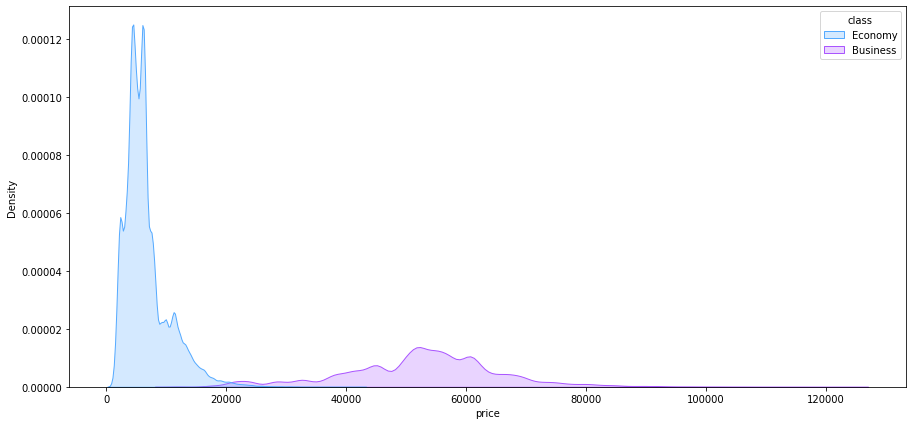

In [56]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=flight_dataset, x='price', hue='class', palette='cool', shade=True)
plt.show()

### Task 6
From the airline and source_city, find the average price

In [40]:
#TO DO: complete the function
def func_task_4(data, ind, val, aggregation):
  "Pivoting table to find the number of flights"
  #pake function task 4
  task_4_p = pd.pivot_table(data, values=val, index=ind, aggfunc=aggregation).reset_index()
  task_4_p = task_4_p.sort_values(by=val, ascending=False)
  return task_4_p.reset_index(drop=True)

In [41]:
#TO DO: complete the task
task_6 = func_task_4(flight_dataset, ind=['airline','flight'], val=['price'], aggregation='mean') #mean=cara cari average price
task_6['price'] = round(task_6['price'],2) #munculin angka 2 dibelakang koma
task_6

,airline,flight,price
0,Air_India,AI-433,44025.00
1,Vistara,UK-820,40522.34
2,Vistara,UK-930,39953.57
3,Vistara,UK-985,39568.60
4,Vistara,UK-970,39421.34
...,...,...,...
1556,Indigo,6E-987,1443.00
1557,Indigo,6E-7141,1105.00
1558,Indigo,6E-7252,1105.00
1559,Indigo,6E-7259,1105.00


### Task 7
From the airline and flights, find the average price in each class.

In [42]:
task_7 = pd.pivot_table(flight_dataset, values=['price'], index=['airline','flight'], columns=['class'], aggfunc='mean')
#task_7.columns.get_level_values(2)
task_7

price              
class                Business       Economy
airline flight                             
AirAsia I5-1228           NaN   3320.687500
        I5-1229           NaN   3457.465686
        I5-1321           NaN   3726.349398
        I5-1426           NaN   3815.158273
        I5-1427           NaN  15140.500000
...                       ...           ...
Vistara UK-988   64436.149254   7071.857143
        UK-993   54710.149123   6224.652747
        UK-994   63022.573574   7192.028007
        UK-995   55981.911765   6751.474708
        UK-996   65919.234168   7048.294719

[1561 rows x 2 columns]

In [44]:
task_7 = pd.pivot_table(flight_dataset, values=['price'], index=['airline','flight'], columns=['class'], aggfunc='mean')
task_7 = task_7.columns.get_level_values(1)
task_7

Index(['Business', 'Economy'], dtype='object', name='class')

In [43]:
task_7.columns

MultiIndex([('price', 'Business'),
            ('price',  'Economy')],
           names=[None, 'class'])

In [53]:
#TO DO: complete the task
task_7 = pd.pivot_table(flight_dataset, values=['price'], index=['airline','flight'], columns=['class'], aggfunc='mean')

# transform to dataframe
task_7.columns = task_7.columns.get_level_values(1)
task_7['Business'], task_7['Economy'] = round(task_7['Business'],2), round(task_7['Economy'],2)
task_7 = task_7.fillna(0) #kalau ada NaN diubah menjadi 0
task_7 = task_7.reset_index()
task_7

class,airline,flight,Business,Economy
0,AirAsia,I5-1228,0.00,3320.69
1,AirAsia,I5-1229,0.00,3457.47
2,AirAsia,I5-1321,0.00,3726.35
3,AirAsia,I5-1426,0.00,3815.16
4,AirAsia,I5-1427,0.00,15140.50
...,...,...,...,...
1556,Vistara,UK-988,64436.15,7071.86
1557,Vistara,UK-993,54710.15,6224.65
1558,Vistara,UK-994,63022.57,7192.03
1559,Vistara,UK-995,55981.91,6751.47


## **Challenge Yourself**

### Challenge 1
Visualize the number 2 and sort the airline based on the number of flights from descending (vertical bar chart is better)

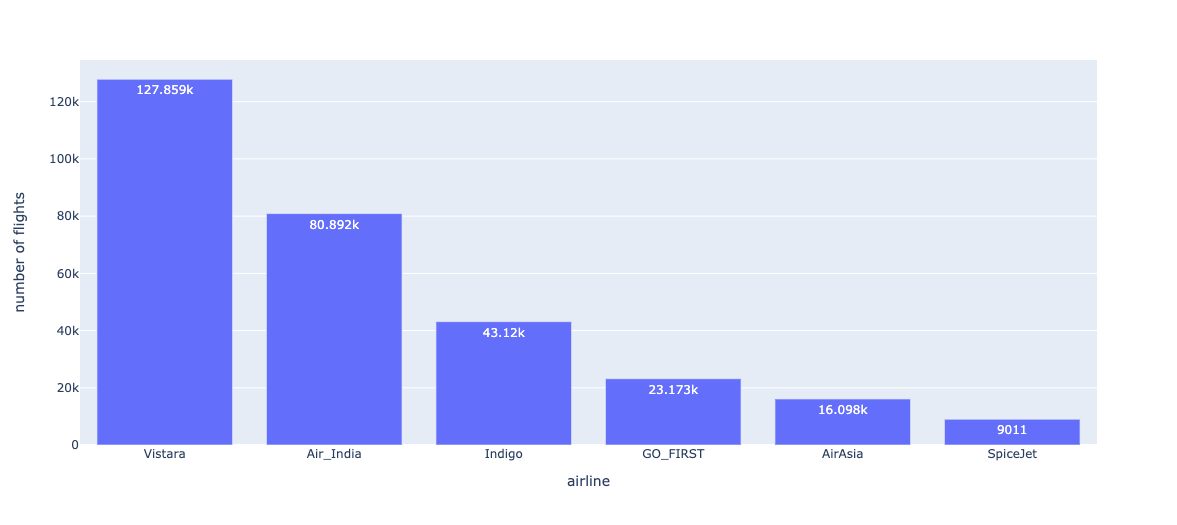

### Challenge 2
Visualize the number 4 both source_city and destination_city (horizontal bar chart is better)

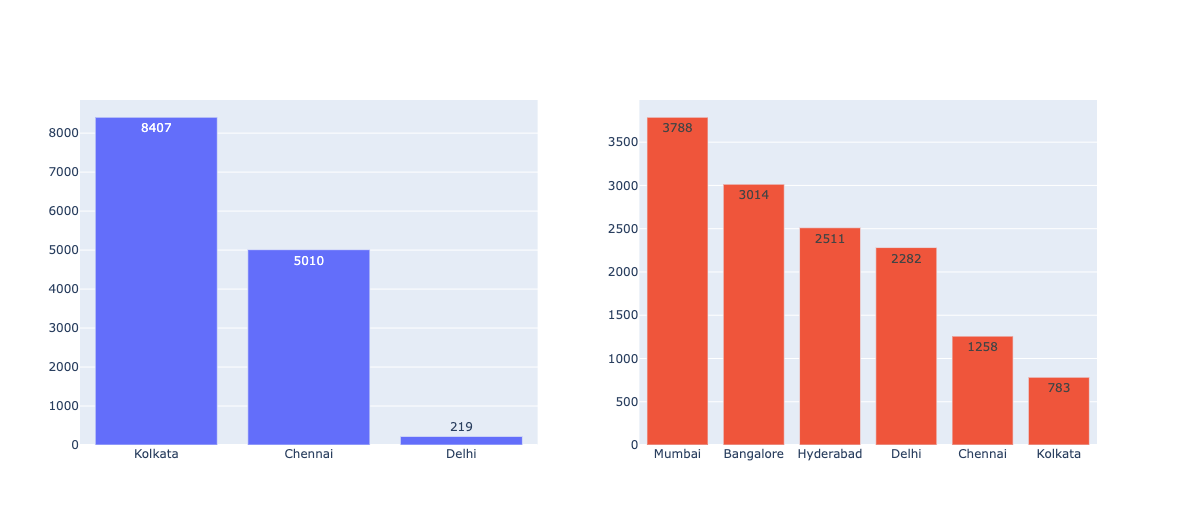